## Notebook Purpose
- This notebook was used to plot figure 2 explaining the effect of adaptive lengthscale based filter to smooth elevation change products
- Last updated: March 7th, 2023


In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from velocity_proc import glac_dyn, constants, velocity_filter, velocity_timeseries
import warnings
import scipy.ndimage
from scipy.ndimage import maximum_filter
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

## Langtang

## Updated on March 7th, 2023

In [5]:
%cd /nobackup/sbhusha1/chapter2/langtang/20230223/

/nobackupp11/sbhusha1/chapter2/langtang/20230223


In [7]:
vx_fn = sorted(glob.glob('20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'))[0]
vy_fn = sorted(glob.glob('20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'))[0]
glac_geom = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['langtang'])).to_crs('EPSG:32645')
icethick_fn = constants.fetch_farinotti_thickness('langtang')
dem1_fn = '../20150222_aligned/20150222_aligned-trans_source-DEM.tif'
ds_list = warplib.memwarp_multi_fn([icethick_fn,dem1_fn,vx_fn,vy_fn],res='first')
H,dem1,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]
#H = np.ma.array(H,mask=np.ma.getmask(vx))
dt = timelib.get_t_factor_fn(dem1_fn,'../20160107_0510_103001004F89CB00_103001004E783B00-DEM_2m.tif')
extent = geolib.ds_extent(ds_list[0])
fig_extent = [extent[0],extent[2],extent[1],extent[3]]
imja_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['imja'])).to_crs(
    'EPSG:32645')
experiment_res = geolib.get_res(ds_list[0],square=True)[0]


Warping all inputs to the following:
Resolution: 25.0
Extent: [368087.5, 3121737.5, 375921.0, 3139937.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: /nobackup/sbhusha1/hma/ngozumpa_lagdz/icethickness/RGI60-15/RGI60-15.04121_thickness.tif
nl: 728 ns: 313 res: 25.000
0...10...20...30...40...50...60...70...80...90...2 of 4: ../20150222_aligned/20150222_aligned-trans_source-DEM.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 4: 20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 4: 20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9

In [8]:
along_slope_dh_orig = glac_dyn.compute_along_slope_flow_correction_working(
                                                        dem1,vx,vy,dt,
                                                        smooth=False,res=experiment_res) 

<AxesSubplot:>

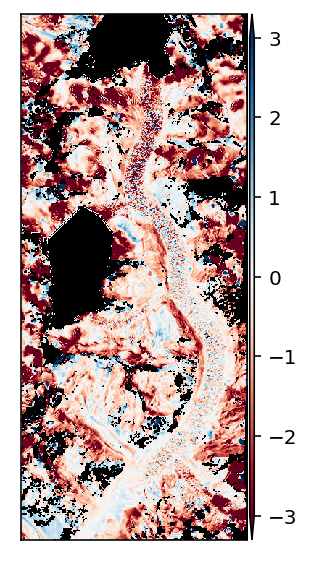

In [9]:
f,ax = plt.subplots()
pltlib.iv(along_slope_dh_orig,ax=ax,cmap='RdBu',clim=(-3,3))

Lengthscales in m: [70.7267427444458, 141.27836227416992, 215.59375762939453, 293.93144607543945, 364.28619384765625, 446.2200927734375, 523.8851165771484, 598.8042449951172, 673.1857299804688, 752.0106506347656, 832.6366424560547, 912.2322845458984, 986.3296508789062, 1062.3347473144531, 1140.7223510742188, 1214.8589324951172, 1289.2434692382812, 1353.0618286132812, 1442.07275390625, 1521.4715576171875]
Lengthscales in pixels: [ 2.84  5.64  8.64 11.76 14.56 17.84 20.96 23.96 26.92 30.08 33.32 36.48
 39.44 42.48 45.64 48.6  51.56 54.12 57.68 60.84]


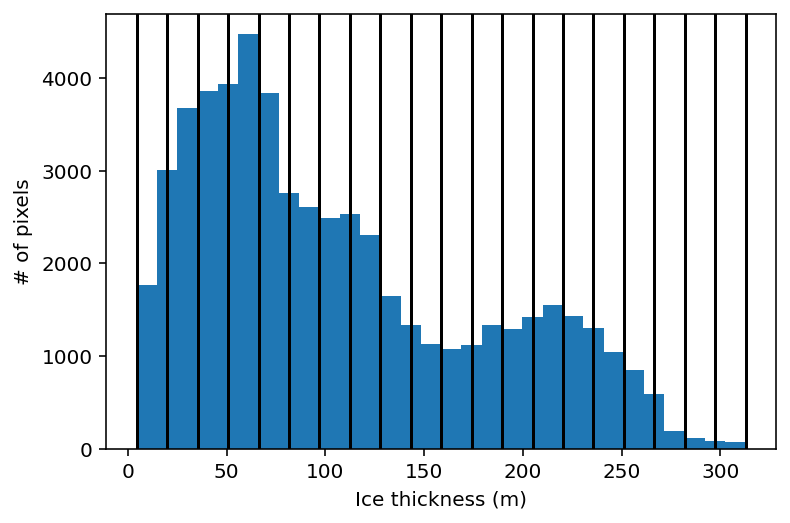

In [10]:
lookup_idx,px_lengthscale = glac_dyn.thickness_division(H,20,factor=[5],
                                                            res=experiment_res)

In [11]:
along_slope_dh_orig_final = glac_dyn.compute_along_slope_flow_correction_working(
                                                        dem1,vx,vy,dt,
                                                        smooth=True,res=experiment_res,
                                px_lengthscale=px_lengthscale,lookup_indexes=lookup_idx)
 

Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 0.999)
Applying original mask
Applying gaussian smoothing filter with size 11 and sigma 1.667 (sum 0.998)
Applying original mask
Applying gaussian smoothing filter with size 15 and sigma 2.333 (sum 0.997)
Applying original mask
Applying gaussian smoothing filter with size 17 and sigma 2.667 (sum 0.997)
Applying original mask
Applying gaussian smoothing filter with size 21 and sigma 3.333 (sum 0.997)
Applying original mask
Applying gaussian smoothing filter with size 23 and sigma 3.667 (sum 0.997)
Applying original mask
Applying gaussian smoothing filter with size 27 and sigma 4.333 (sum 0.996)
Applying original mask
Applying gaussian smoothing filter with size 31 and sigma 5.000 (sum 0.996)
Applying original mask
Applying gaus

In [13]:
xlim_langtang = (368260.9172969457, 375939.96974715684)
ylim_langtang = (3121737.5, 3139839.414203844)
ylim_langtang

(3121737.5, 3139839.414203844)

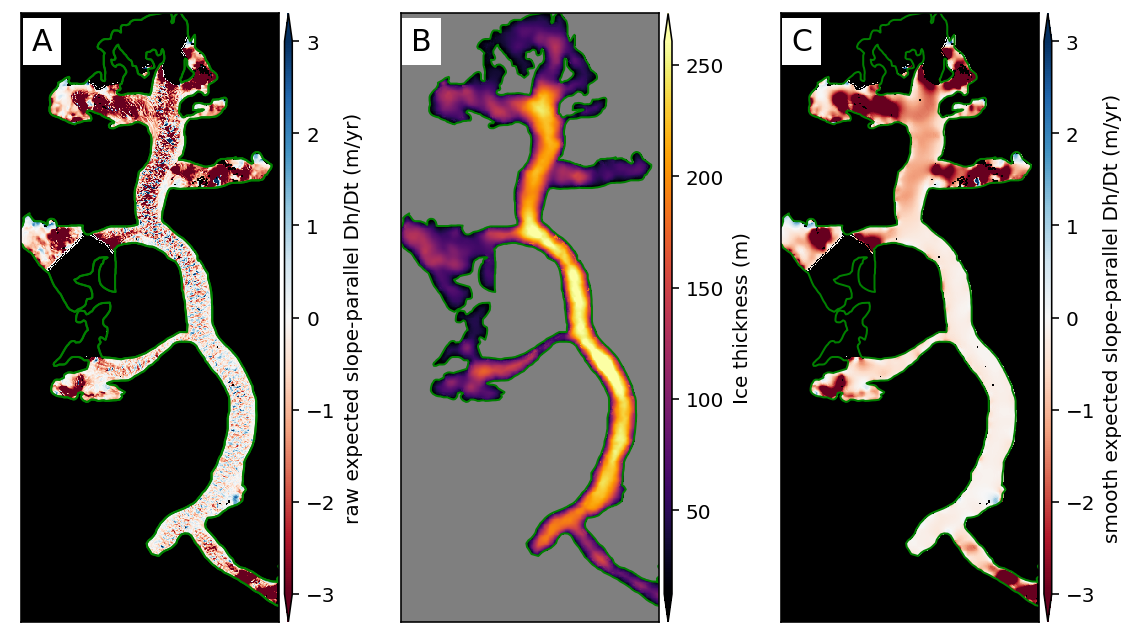

In [25]:
f,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(8,6))
pltlib.iv(velocity_timeseries.mask_by_shp(glac_geom.geometry,
                                          along_slope_dh_orig,ds=ds_list[0]),
          ax=ax[0],cmap='RdBu',clim=(-3,3),extent=fig_extent,skinny=False,label='raw expected slope-parallel Dh/Dt (m/yr)')
pltlib.iv(H,ax=ax[1],cmap='inferno',extent=fig_extent,skinny=False,label='Ice thickness (m)')
pltlib.iv(along_slope_dh_orig_final,ax=ax[2],cmap='RdBu',clim=(-3,3),extent=fig_extent,skinny=False,label='smooth expected slope-parallel Dh/Dt (m/yr)')
glac_geom.plot(ax=ax[0],facecolor='None',edgecolor='green')
for axa in ax.ravel():
    axa.set_xlim(xlim_langtang)
    axa.set_ylim(ylim_langtang)
    glac_geom.plot(ax=axa,facecolor='None',edgecolor='green')
t = ax[0].text(0.04,0.94,'A',
    color='k', fontsize=15,transform=ax[0].transAxes)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = ax[1].text(0.04,0.94,'B',
    color='k', fontsize=15,transform=ax[1].transAxes)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = ax[2].text(0.04,0.94,'C',
    color='k', fontsize=15,transform=ax[2].transAxes)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
f.savefig(f'/nobackup/sbhusha1/chapter2/figures/langtang_adaptive_smooth_final_comparison.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [18]:
import matplotlib.colors as mcolors

In [19]:
colors = mcolors.TABLEAU_COLORS


In [23]:
colors

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

In [10]:
colors = ['blue','brown', 'green', 'olive', 'cyan']

In [17]:
%matplotlib inline

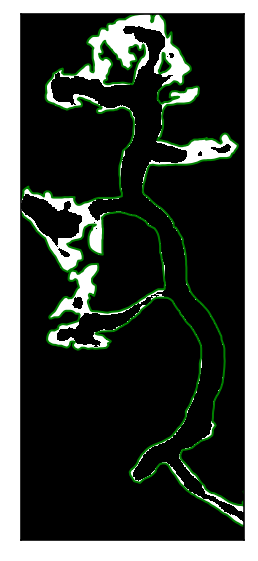

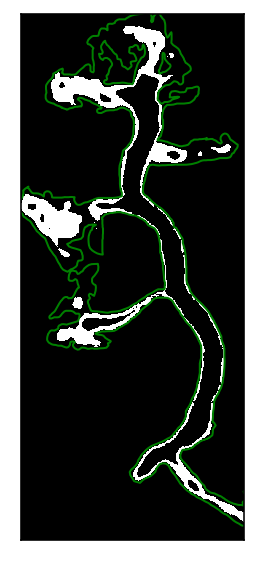

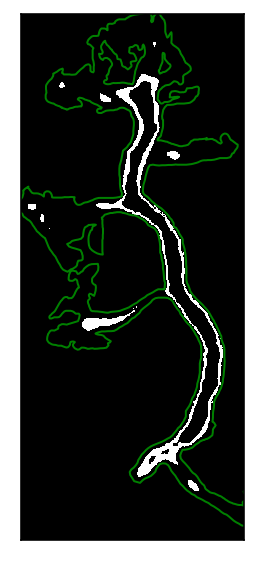

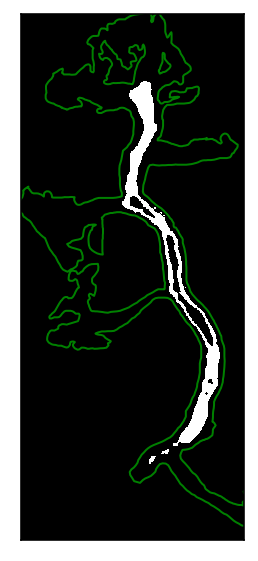

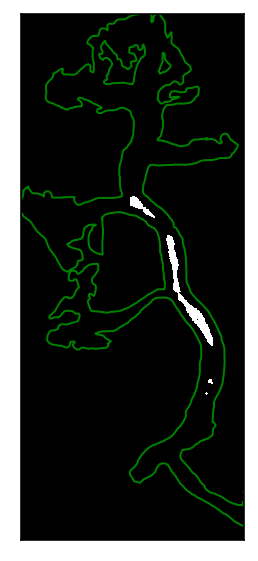

In [25]:
for i in range(len(lookup_idx)):
    f,ax = plt.subplots()
    pltlib.iv(lookup_idx[i],ax=ax,cmap='gray',clim=(0,1),extent=fig_extent,cbar=False)
    glac_geom.plot(ax=ax,facecolor='None',edgecolor='green')
    ax.set_xlim(xlim_langtang)
    ax.set_ylim(ylim_langtang)
    f.savefig(f'/nobackup/sbhusha1/agu22/adaptive_thickness/langtang{i}.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

(3121737.5, 3139839.414203844)

In [27]:
f,ax = plt.subplots(1,2)
pltlib.iv(H,ax=ax[0],cmap='inferno',label='ice thickness (m)')
pltlib.iv(along_slope_dh_orig,ax=ax[1],cmap='RdBu',clim=(-4,4))

for individual_idx in lookup_idx:
    ax[0].contour(individual_idx,colors=colors)
    ax[1].contour(individual_idx,colors=colors)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

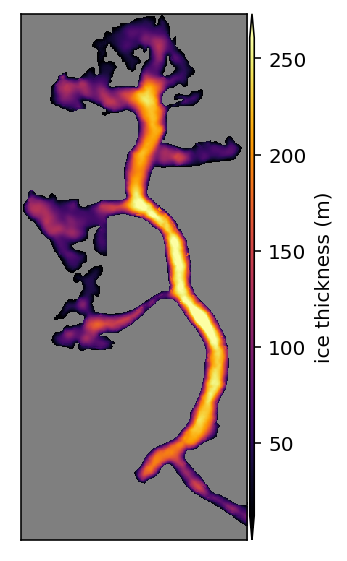

In [16]:
f,ax = plt.subplots()
pltlib.iv(H,ax=ax,cmap='inferno',label='ice thickness (m)')

In [41]:
n = 5
origmask=True
t1 = np.ma.dstack([np.zeros_like(along_slope_dh_orig)]*n)
smooth_ma = np.ma.dstack([np.zeros_like(along_slope_dh_orig)]*n)

Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 0.999)
Applying original mask
Applying gaussian smoothing filter with size 19 and sigma 3.000 (sum 0.997)
Applying original mask
Applying gaussian smoothing filter with size 31 and sigma 5.000 (sum 0.996)
Applying original mask
Applying gaussian smoothing filter with size 43 and sigma 7.000 (sum 0.996)
Applying original mask
Applying gaussian smoothing filter with size 53 and sigma 8.667 (sum 0.996)
Applying original mask


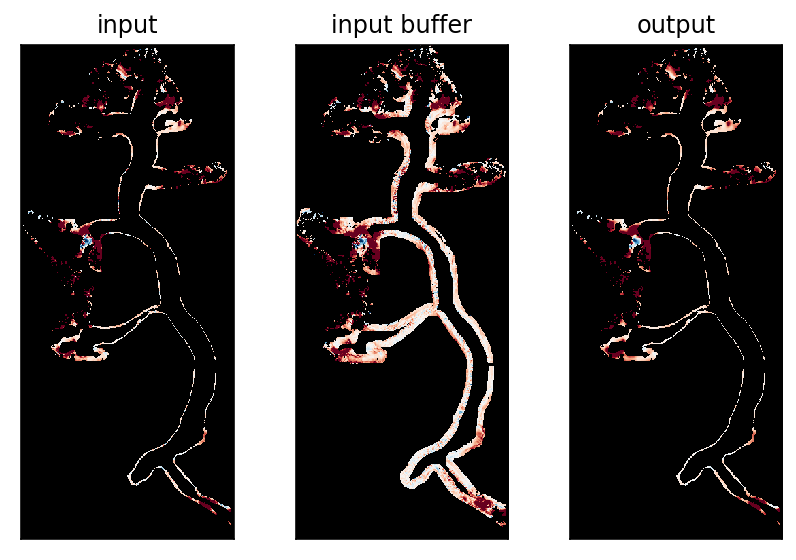

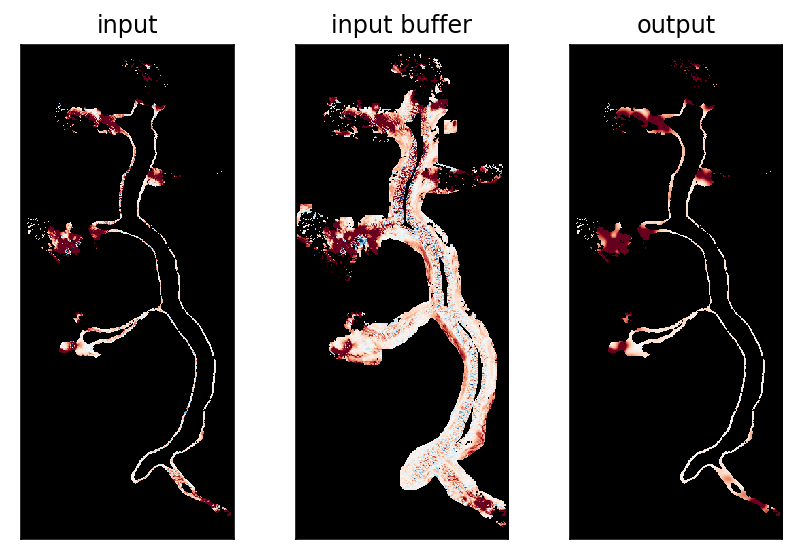

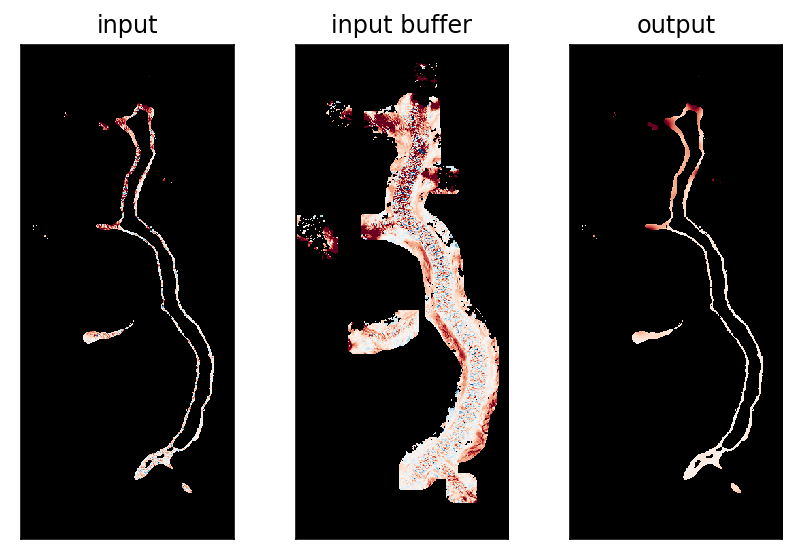

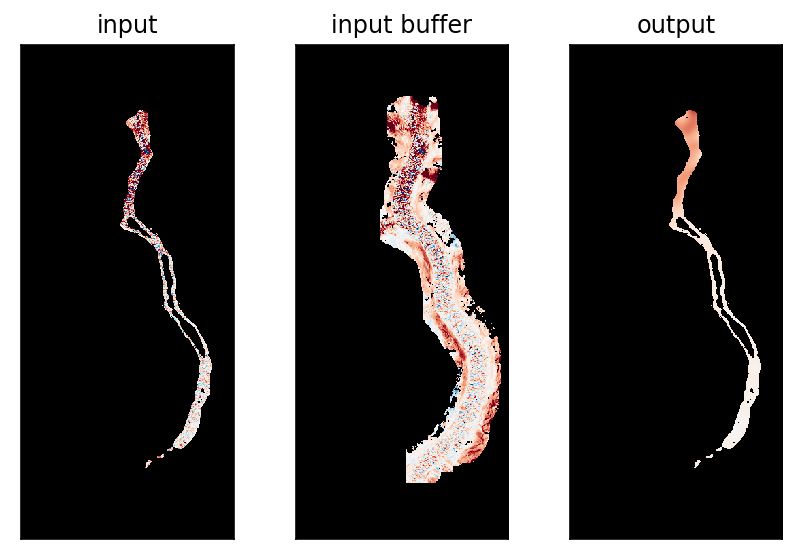

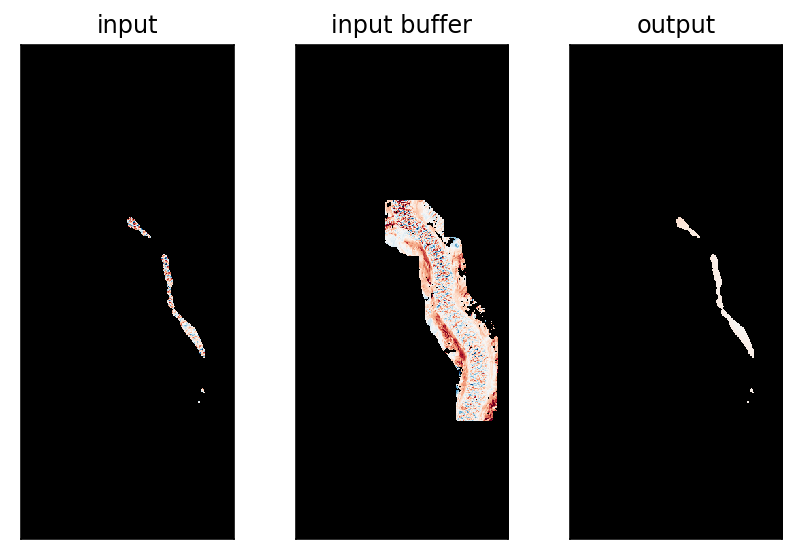

In [48]:
for idx,px_length in enumerate(px_lengthscale):
    if px_length < 3:
        buff_dis = 3
    elif (int(px_length) % 2) != 0:
        buff_dis = int(px_length) + 1
    else:
        buff_dis = int(px_length)
    buffer_index = maximum_filter(lookup_idx[idx],size=px_length,mode='constant',cval=0).astype(bool)
    
    t1[:,:,idx][lookup_idx[idx]] = along_slope_dh_orig[lookup_idx[idx]]
    t1 = np.ma.masked_equal(t1,0)
    # sample the array at the buffered locations

    ma_filter = np.ma.array(np.ma.masked_equal(along_slope_dh_orig,0.0),mask=~buffer_index)

    # run gaussian filter         
    temp_gauss = glac_dyn.gauss_fltr_astropy_fft(ma_filter,size=px_length,origmask=origmask)
    smooth_ma[:,:,idx][lookup_idx[idx]] = temp_gauss[lookup_idx[idx]]
    smooth_ma = np.ma.masked_equal(smooth_ma,0)
    f,ax = plt.subplots(1,3)
    pltlib.iv(t1[:,:,idx],ax=ax[0],cmap='RdBu',clim=(-3,3),cbar=False,title='input')
    pltlib.iv(ma_filter,ax=ax[1],cmap='RdBu',clim=(-3,3),cbar=False,title='input buffer')
    pltlib.iv(smooth_ma[:,:,idx],ax=ax[2],cmap='RdBu',clim=(-3,3),cbar=False, title='output')
    f.savefig(f'/nobackup/sbhusha1/agu22/adaptive_thickness/langtang_smooth_{idx}.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

## Old, exploratory for Imja

In [4]:
%cd /nobackup/deshean/ps_velocity/imja/dem_dir/aligned_dems/hstest/quick_test/

/nobackupp19/deshean/ps_velocity/imja/dem_dir/aligned_dems/hstest/quick_test


In [40]:

glac_geom = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['imja'])).to_crs('EPSG:32645')
icethick_fn = constants.fetch_farinotti_thickness('imja')
vx_fn = '/nobackupp19/deshean/ps_velocity/imja/dem_dir/aligned_dems/hstest/20151002_aligned_hs__20161029_aligned_hs_mgm_disp_9spm_9px/20151002_aligned_hs__20161029_aligned_hs_mgm_disp_9spm_9px_vx_ncc_cutoff_skiprate_4_inpaint_limit_100px.tif'
vy_fn = '/nobackupp19/deshean/ps_velocity/imja/dem_dir/aligned_dems/hstest/20151002_aligned_hs__20161029_aligned_hs_mgm_disp_9spm_9px/20151002_aligned_hs__20161029_aligned_hs_mgm_disp_9spm_9px_vy_ncc_cutoff_skiprate_4_inpaint_limit_100px.tif'
dem1_fn = '../../20151002_aligned.tif'
ds_list = warplib.memwarp_multi_fn([icethick_fn,dem1_fn,vx_fn,vy_fn],res='first')
H,dem1,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]
H = np.ma.array(H,mask=np.ma.getmask(vx))
dt = timelib.get_t_factor_fn(dem1_fn,'../../20161029_aligned.tif')


Warping all inputs to the following:
Resolution: 25.0
Extent: [492962.5, 3084909.0, 498337.5, 3092462.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: /nobackup/sbhusha1/hma/ngozumpa_lagdz/icethickness/RGI60-15/RGI60-15.03743_thickness.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 4: ../../20151002_aligned.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 4: /nobackupp19/deshean/ps_velocity/imja/dem_dir/aligned_dems/hstest/20151002_aligned_hs__20161029_aligned_hs_mgm_disp_9spm_9px/20151002_aligned_hs__20161029_aligned_hs_mgm_disp_9spm_9px_vx_ncc_cutoff_skiprate_4_inpaint_limit_100px.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 4: /nobackupp19/deshean/ps_velocity/imja/dem_dir/aligned_dems/hstest/20151002_aligned_hs__20161029_aligned_hs_mgm_disp_9spm_9px/20151002_aligned_hs__20161029_alig

In [41]:
extent = geolib.ds_extent(ds_list[0])
fig_extent = [extent[0],extent[2],extent[1],extent[3]]
imja_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['imja'])).to_crs(
    'EPSG:32645')

In [42]:
experiment_res = geolib.get_res(ds_list[0],square=True)[0]

In [43]:
along_slope_dh_orig = glac_dyn.compute_along_slope_flow_correction_working(
                                                        dem1,vx,vy,dt,
                                                        smooth=False,res=experiment_res) 

<AxesSubplot:>

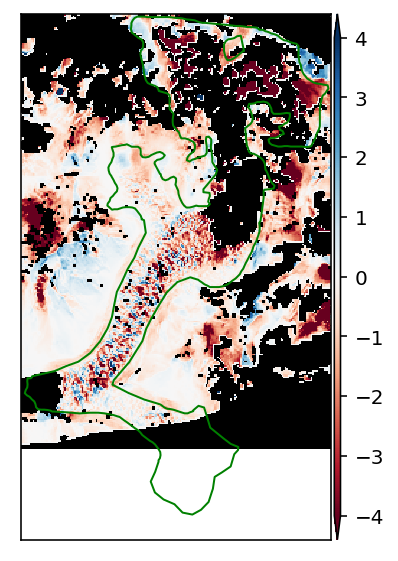

In [44]:
f,ax = plt.subplots()
pltlib.iv(along_slope_dh_orig,ax=ax,cmap='RdBu',clim=(-4,4),extent=fig_extent)
imja_shp.plot(ax=ax,facecolor='None',edgecolor='green')

<AxesSubplot:>

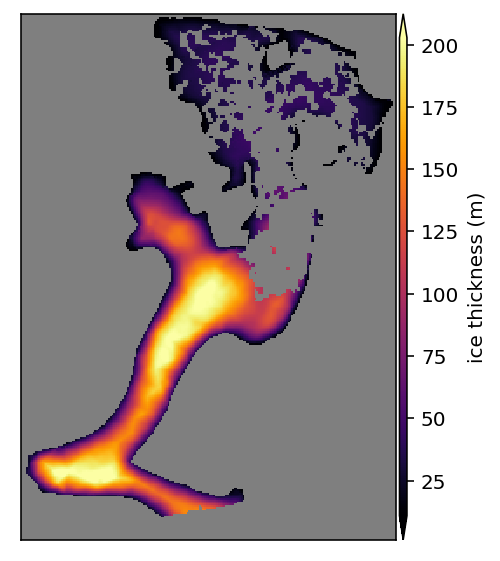

In [45]:
f,ax = plt.subplots()
pltlib.iv(H,ax=ax,cmap='inferno',label='ice thickness (m)')

Lengthscales in m: [157.95571327209473, 329.4071960449219, 558.5909652709961, 730.3030395507812, 959.0761566162109]
Lengthscales in pixels: [ 6.32 13.16 22.36 29.2  38.36]


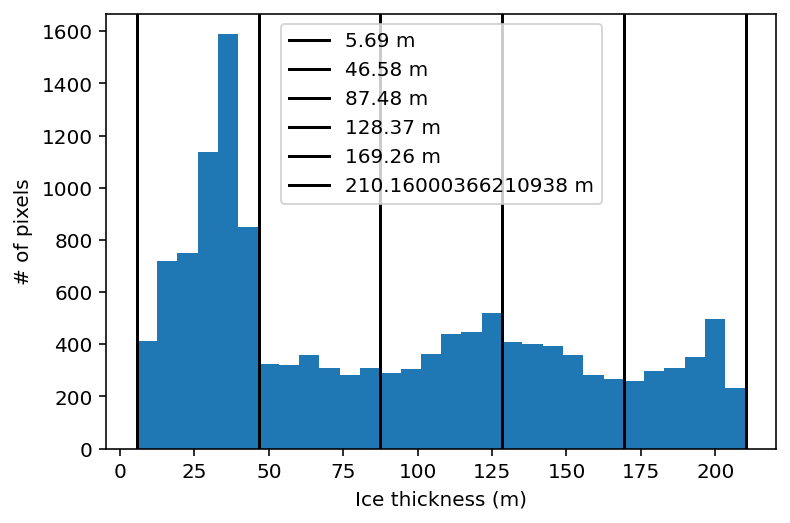

In [46]:
lookup_idx,px_lengthscale = glac_dyn.thickness_division(H,5,factor=[5],
                                                            res=experiment_res)

In [47]:
959/5

191.8

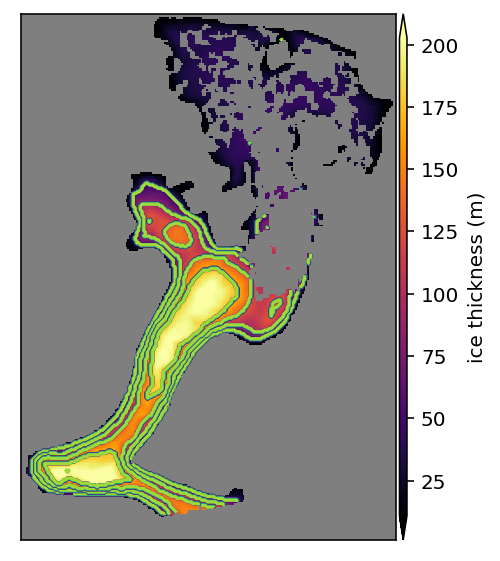

In [48]:
f,ax = plt.subplots()
pltlib.iv(H,ax=ax,cmap='inferno',label='ice thickness (m)')
for individual_idx in lookup_idx:
    ax.contour(individual_idx,color='green')

In [50]:
along_slope_dh_orig_imja = velocity_timeseries.mask_by_shp(imja_shp.geometry,
                                                           along_slope_dh_orig,ds=ds_list[0])
                                                       

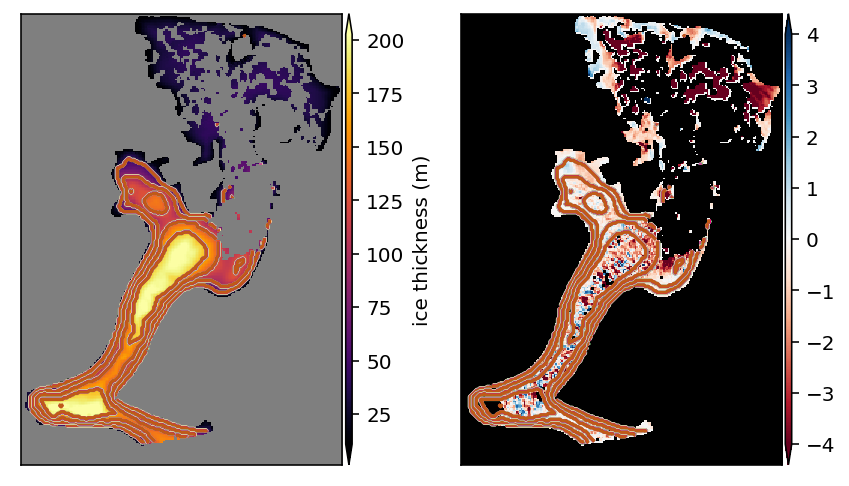

In [71]:
f,ax = plt.subplots(1,2)
pltlib.iv(H,ax=ax[0],cmap='inferno',label='ice thickness (m)')
pltlib.iv(along_slope_dh_orig_imja,ax=ax[1],cmap='RdBu',clim=(-4,4))

for individual_idx in lookup_idx:
    ax[0].contour(individual_idx,cmap='Accent')
    ax[1].contour(individual_idx,cmap='Accent')

In [57]:
origmask=True

In [63]:
H.shape

(302, 215)

In [64]:
302*215

64930

In [62]:
temp_gauss[lookup_idx[idx]].size

9793

In [66]:
n = 5
smooth_ma = np.ma.dstack([np.zeros_like(along_slope_dh_orig)]*n)

Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 0.999)
Applying original mask
Applying gaussian smoothing filter with size 13 and sigma 2.000 (sum 0.998)
Applying original mask
Applying gaussian smoothing filter with size 23 and sigma 3.667 (sum 0.997)
Applying original mask
Applying gaussian smoothing filter with size 29 and sigma 4.667 (sum 0.996)
Applying original mask
Applying gaussian smoothing filter with size 39 and sigma 6.333 (sum 0.996)
Applying original mask


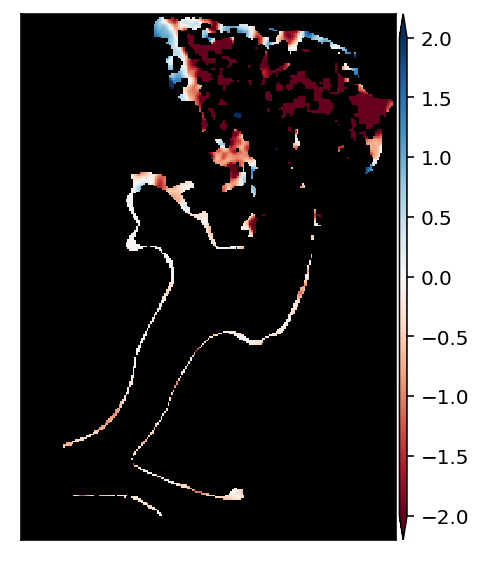

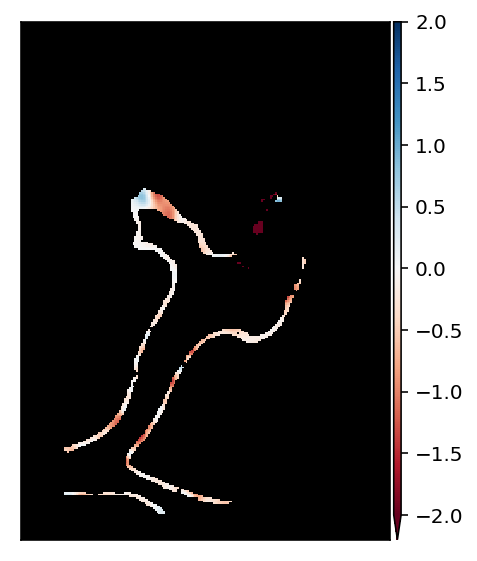

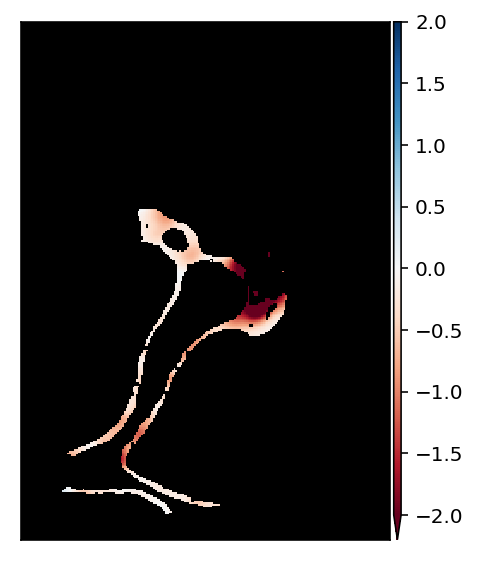

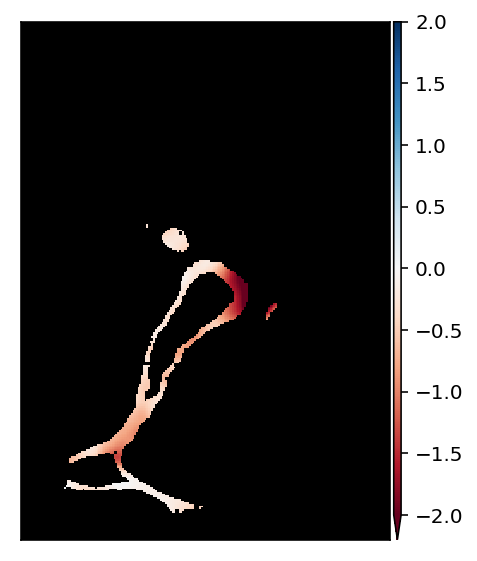

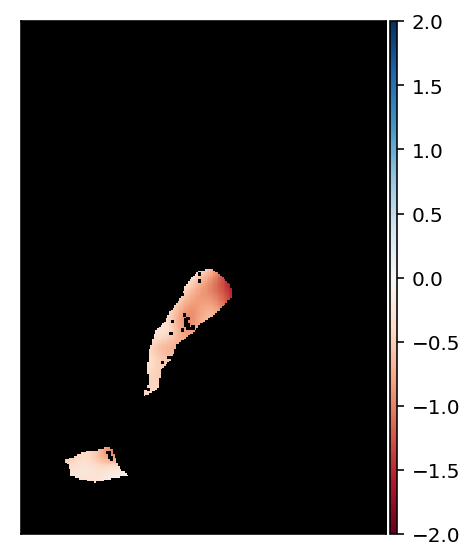

In [70]:
for idx,px_length in enumerate(px_lengthscale):
    if px_length < 3:
        buff_dis = 3
    elif (int(px_length) % 2) != 0:
        buff_dis = int(px_length) + 1
    else:
        buff_dis = int(px_length)
    buffer_index = maximum_filter(lookup_idx[idx],size=px_length,mode='constant',cval=0).astype(bool)
    # sample the array at the buffered locations

    ma_filter = np.ma.array(np.ma.masked_equal(along_slope_dh_orig,0.0),mask=~buffer_index)

    # run gaussian filter         
    temp_gauss = glac_dyn.gauss_fltr_astropy_fft(ma_filter,size=px_length,origmask=origmask)
    smooth_ma[:,:,idx][lookup_idx[idx]] = temp_gauss[lookup_idx[idx]]
    smooth_ma = np.ma.masked_equal(smooth_ma,0)
    f,ax = plt.subplots()
    pltlib.iv(smooth_ma[:,:,idx],ax=ax,cmap='RdBu',clim=(-2,2))

In [73]:
along_slope_dh_orig_final = glac_dyn.compute_along_slope_flow_correction_working(
                                                        dem1,vx,vy,dt,
                                                        smooth=True,res=experiment_res,
                                px_lengthscale=px_lengthscale,lookup_indexes=lookup_idx)
 

Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 0.999)
Applying original mask
Applying gaussian smoothing filter with size 13 and sigma 2.000 (sum 0.998)
Applying original mask
Applying gaussian smoothing filter with size 23 and sigma 3.667 (sum 0.997)
Applying original mask
Applying gaussian smoothing filter with size 29 and sigma 4.667 (sum 0.996)
Applying original mask
Applying gaussian smoothing filter with size 39 and sigma 6.333 (sum 0.996)
Applying original mask


<AxesSubplot:>

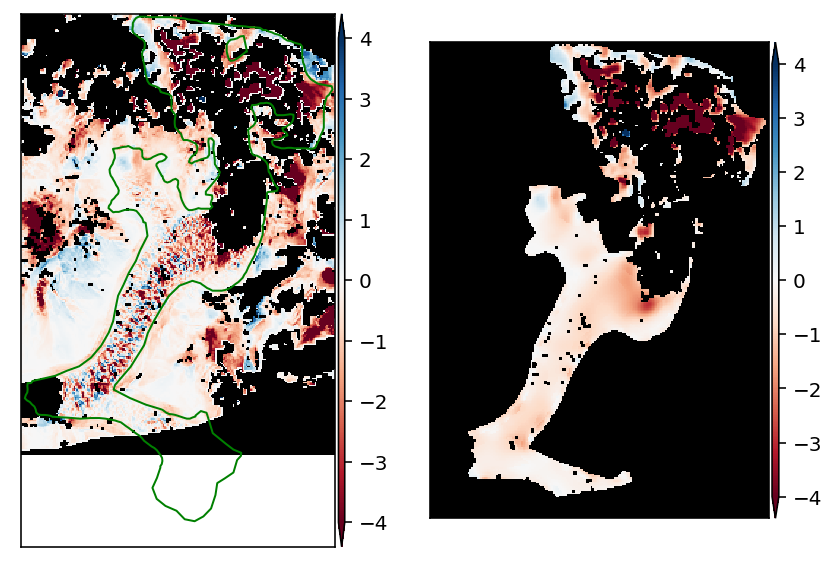

In [75]:
f,ax = plt.subplots(1,2)
pltlib.iv(along_slope_dh_orig,ax=ax[0],cmap='RdBu',clim=(-4,4),extent=fig_extent)
pltlib.iv(along_slope_dh_orig_final,ax=ax[1],cmap='RdBu',clim=(-4,4),extent=fig_extent)
imja_shp.plot(ax=ax[0],facecolor='None',edgecolor='green')